<a href="https://colab.research.google.com/github/Aman78695/Case-Study-Prioritizing-Sites-and-Market-Segments-for-a-US--Based-Sanitation-Company/blob/main/Case_Study_Prioritizing_Sites_and_Market_Segments_for_a_US_Based_Sanitation_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('/content/Data Science - Case - DataSet for analysis.xlsx')

In [6]:
pd.set_option("display.max_columns",None)

In [7]:
df.head()

,Division,Plnt #,Plant City,Plant State/Province,Market Segment,Plant Age (Years),Active Employees (no),Man Hours,Overtime,Retention Rate,% of English Speakers,% Other/Not Specified,% Spanish Speakers,Avg Tenure (Years),Turnover Rate,Severity Rate,Injury Recordable Rate,Safety Assessment Score,Lost Days due to Injuries,Total Claims,# of Recorable Events
0,Midwest 11,409,Wichita,KS,Pork - Kill & Processing,9.276712,3.0,4148.07,2.506415,1.0,0.333333,0.333333,0.333333,8.108676,0.333333,0.0,0.0,98.676667,0.0,0.0,0
1,Southcentral 21,553,Fort Smith,AR,Poultry - Kill & Processing,9.832877,11.0,14189.20,27.565472,0.7,0.666667,0.000000,0.333333,3.821613,0.800000,0.0,0.0,98.575000,0.0,0.0,0
2,Southwest 14,455,Northlake,TX,Beverage,2.690411,3.0,4109.26,3.286604,0.5,0.666667,0.000000,0.333333,2.324201,0.857143,0.0,0.0,98.057500,0.0,0.0,0
3,Southeast 15,834,St. Martinville,LA,RTE / Prepared,3.715068,5.0,6005.52,1.205094,0.6,0.800000,0.200000,0.000000,3.549589,1.636364,0.0,0.0,97.966667,0.0,0.0,0
4,Northeast 12,284,Woburn,MA,Pork - Further Processing,13.430137,10.0,10864.01,1.820566,0.6,0.100000,0.200000,0.700000,4.642192,0.571429,0.0,0.0,97.910000,0.0,0.0,0


- **Division:** Represents the geographical division of the company or the region where the plant is located.<br><br>

- **Plnt #:** Plant number or identifier assigned to the plant.<br><br>

- **Plant State/Province:** State or province in which the plant operates.<br><br>

- **Market Segment:** The specific market or industry segment the plant serves (e.g., Pork - Kill & Processing, Poultry - Kill & Processing).<br><br>

- **Plant Age (Years): **Age of the plant in years, indicating how long the plant has been operational.<br><br>

- **Active Employees (no):** Number of active employees currently working at the plant.<br><br>

- **Man Hours:** Total number of hours worked by employees at the plant.<br><br>

- **Overtime:** Amount of extra time worked beyond regular hours by employees, often measured in hours or as a percentage of regular working hours.<br><br>

- **Retention Rate:** Percentage of employees retained by the plant within a certain period.<br><br>

- **% of English Speakers:** Percentage of employees who speak English at the plant.<br><br>

- **% Other/Not Specified:** Percentage of employees with languages other than English specified or not specified.<br><br>

-** % Spanish Speakers: **Percentage of employees who speak Spanish at the plant.<br><br>

- **Avg Tenure (Years):** Average length of time employees have been working at the plant.<br><br>

- **Turnover Rate:** The rate at which employees leave or are replaced at the plant, often calculated as a percentage.<br><br>

- **Severity Rate:** Measures the seriousness of workplace injuries or accidents.<br><br>

- **Injury Recordable Rate:** Records the rate of injuries that require recording or reporting.<br><br>

- **Safety Assessment Score: **A score assessing the safety performance or condition of the plant.<br><br>

- **Lost Days due to Injuries:** The number of workdays lost due to workplace injuries.<br><br>

- **Total Claims: **The total number of injury or accident claims reported.<br><br>

- **# of Recordable Events:** The count of workplace incidents that need to be recorded or reported.<br><br>



In [ ]:
df.shape

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Division                   440 non-null    object 
 1   Plnt #                     440 non-null    int64  
 2   Plant City                 439 non-null    object 
 3   Plant State/Province       439 non-null    object 
 4   Market Segment             439 non-null    object 
 5   Plant Age (Years)          439 non-null    float64
 6   Active Employees (no)      438 non-null    float64
 7   Man Hours                  440 non-null    float64
 8   Overtime                   406 non-null    float64
 9   Retention Rate             367 non-null    float64
 10  % of English Speakers      407 non-null    float64
 11  % Other/Not Specified      407 non-null    float64
 12  % Spanish Speakers         407 non-null    float64
 13  Avg Tenure (Years)         407 non-null    float64

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [14]:
df.duplicated().sum()

0

### Column Types

- **Numerical** -                                                                         
      'Plant Age (Years)', 'Active Employees (no)', 'Man Hours', 'Overtime',
       'Retention Rate ', '% of English Speakers', '% Other/Not Specified',
       '% Spanish Speakers', 'Avg Tenure (Years)', 'Turnover Rate',
       'Severity Rate', 'Injury Recordable Rate', 'Safety Assessment Score',
       'Lost Days due to Injuries', 'Total Claims', '# of Recorable Events'
- **Categorical** -                                                
      Division,	Plnt #	,Plant City	,Plant State/Province	,Market Segment

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Computing basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Creating visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identifying and examining any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Checking for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarizing the findings of the EDA and make decisions about how to proceed with further analysis.

##Analysis on numerical column

In [40]:
num_df=df.iloc[:,5:]
num_df.describe()

,Plant Age (Years),Active Employees (no),Man Hours,Overtime,Retention Rate,% of English Speakers,% Other/Not Specified,% Spanish Speakers,Avg Tenure (Years),Turnover Rate,Severity Rate,Injury Recordable Rate,Safety Assessment Score,Lost Days due to Injuries,Total Claims,# of Recorable Events
count,439.000000,438.000000,440.000000,406.000000,367.000000,407.000000,407.000000,407.000000,407.000000,403.000000,440.000000,440.000000,385.000000,440.000000,440.000000,440.000000
mean,8.359116,37.493151,50764.137205,174.472908,0.523585,0.541081,0.129519,0.329401,2.939786,1.124564,2.188288,3.282562,92.417764,3.013242,5246.805522,3.868182
std,6.673300,43.221570,61513.413329,254.501952,0.202207,0.301339,0.148276,0.278190,1.944500,0.704167,5.018757,7.069151,4.942056,9.033308,24374.106727,6.621624
min,0.060274,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169863,0.000000,0.000000,0.000000,60.013333,0.000000,0.000000,0.000000
25%,2.541096,10.000000,10780.552500,20.261085,0.418900,0.278889,0.000000,0.061012,1.580488,0.597297,0.000000,0.000000,90.857500,0.000000,0.000000,0.000000
50%,7.164384,20.000000,24049.455000,65.602925,0.545500,0.545455,0.083333,0.288889,2.600701,0.984127,0.000000,0.000000,93.860000,0.000000,707.892857,1.000000
75%,12.691781,48.750000,65687.435000,215.276651,0.644600,0.800000,0.200000,0.553007,3.691500,1.541958,1.816162,3.702373,95.473333,1.754511,3852.428571,4.250000
max,32.315068,245.000000,389304.070000,1678.605849,1.000000,1.000000,0.735294,1.000000,14.284247,4.375000,34.111822,57.297561,98.676667,96.000000,465945.000000,64.000000


In [27]:
len(num_df.columns)

16

In [26]:
#calculating skewness in the columns
for i in num_df.columns:
  print(i,'->     ',df[i].skew())
  print()

Plant Age (Years) ->      0.7842919422097635

Active Employees (no) ->      2.0384975440087776

Man Hours ->      2.0829101685655953

Overtime ->      2.336508302175501

Retention Rate  ->      -0.35036794324282616

% of English Speakers ->      -0.049785715097470026

% Other/Not Specified ->      1.624351358347804

% Spanish Speakers ->      0.4034708980291364

Avg Tenure (Years) ->      2.0381025657764535

Turnover Rate ->      1.1053842186844633

Severity Rate ->      3.1622134168151264

Injury Recordable Rate ->      3.376788717220936

Safety Assessment Score ->      -2.460421972824368

Lost Days due to Injuries ->      5.429793830547031

Total Claims ->      15.945817308549689

# of Recorable Events ->      3.564557068064794



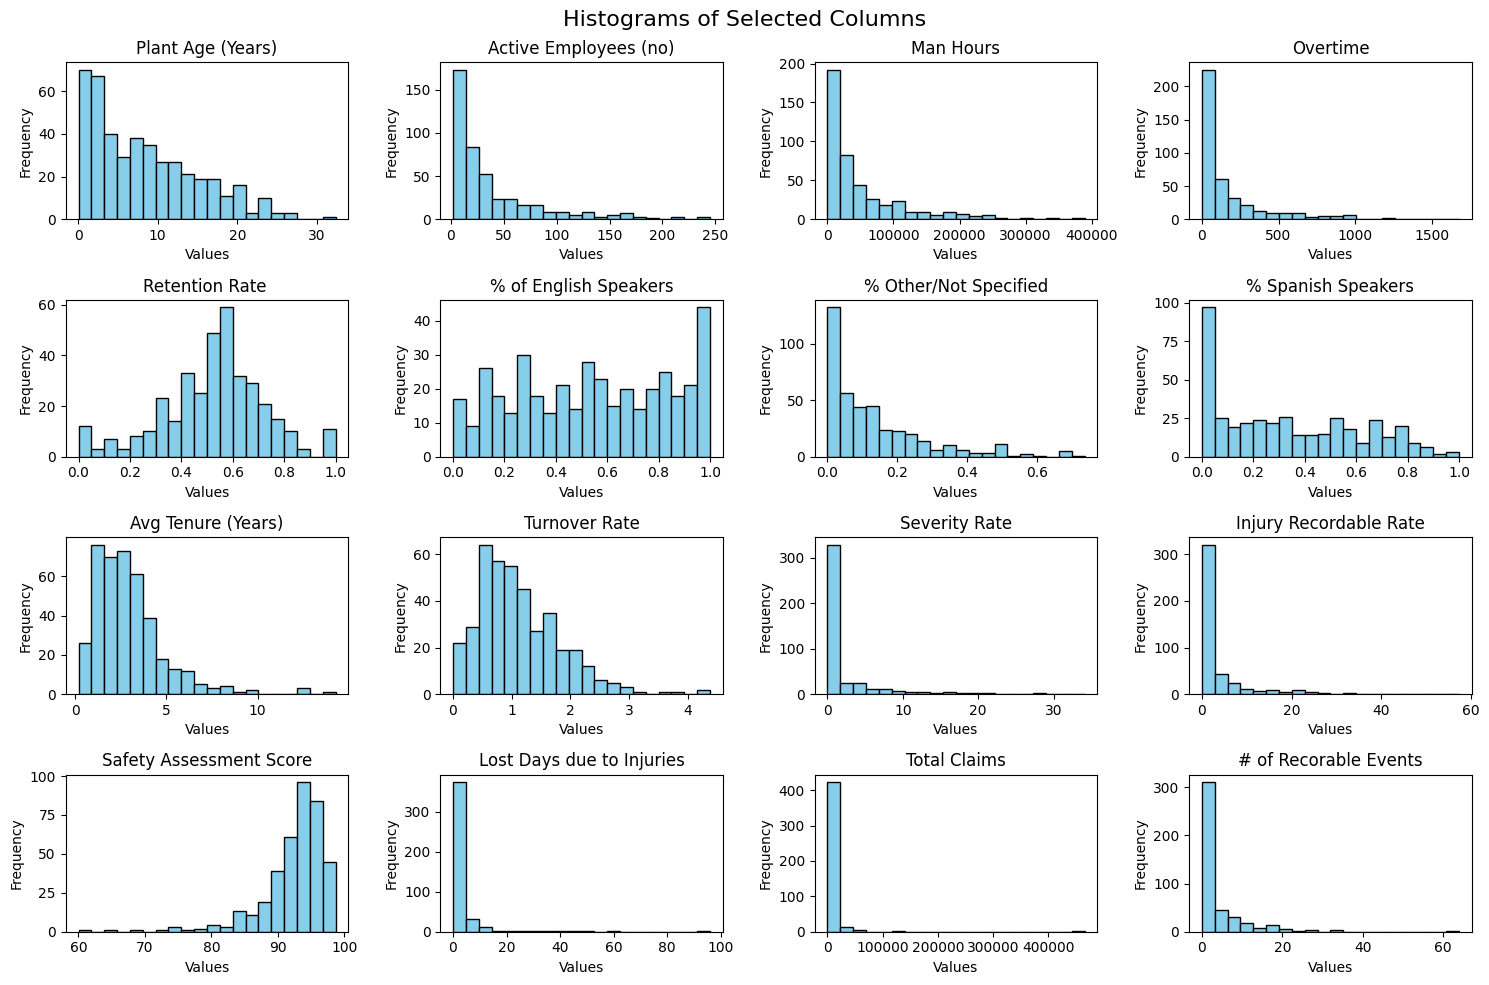

In [28]:
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
fig.suptitle('Histograms of Selected Columns', fontsize=16)


axes = axes.flatten()

# Looping through columns and ploting histograms
for i, column in enumerate(num_df.columns):
    ax = axes[i]
    ax.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

<ipython-input-38-70be86dc3971>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), ax=ax, color='red', shade=True)
<ipython-input-38-70be86dc3971>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), ax=ax, color='red', shade=True)
<ipython-input-38-70be86dc3971>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna(), ax=ax, color='red', shade=True)
<ipython-input-38-70be86dc3971>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column].dropna

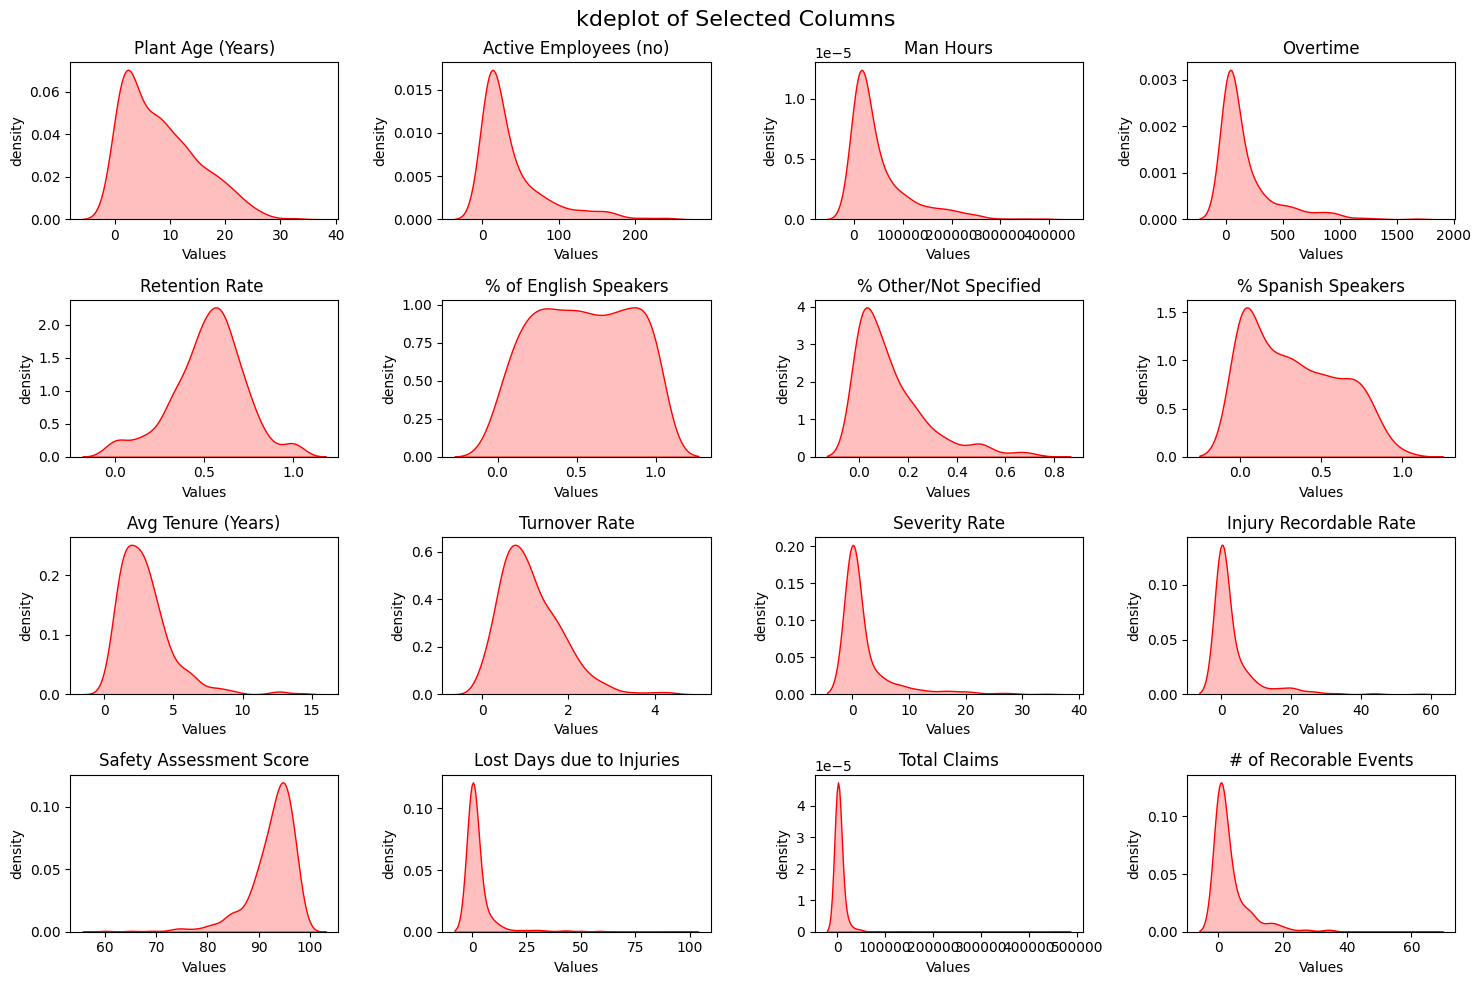

In [38]:
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
fig.suptitle('kdeplot of Selected Columns', fontsize=16)


axes = axes.flatten()

# Looping through columns and ploting kde
for i, column in enumerate(num_df.columns):
    ax = axes[i]
    sns.kdeplot(df[column].dropna(), ax=ax, color='red', shade=True)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('density')


plt.tight_layout()
plt.show()

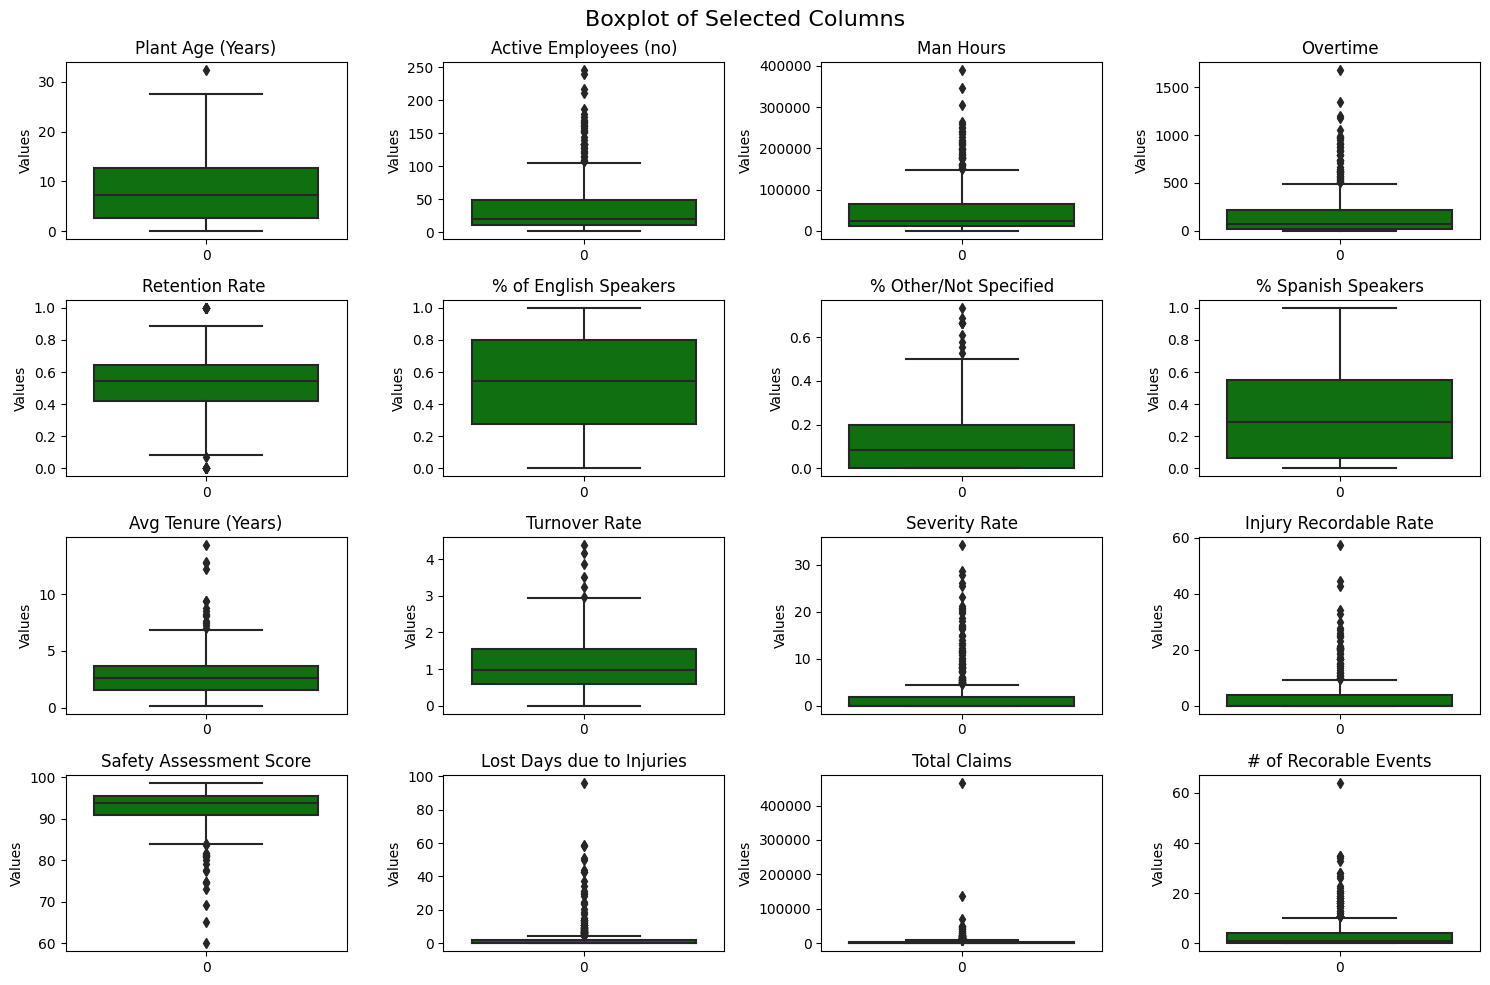

In [39]:
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
fig.suptitle('Boxplot of Selected Columns', fontsize=16)


axes = axes.flatten()

# Looping through columns and ploting kde
for i, column in enumerate(num_df.columns):
    ax = axes[i]
    sns.boxplot(df[column].dropna(), ax=ax, color='green')
    ax.set_title(column)
    ax.set_ylabel('Values')




plt.tight_layout()
plt.show()

##Observations and Conclusion

#Skewness:

- Skewed Towards Right (Positive Skewness):<br> Plant Age (Years), Active Employees (no), Man Hours, Overtime, % of English Speakers, % Other/Not Specified, % Spanish Speakers, Avg Tenure (Years), Turnover Rate, Severity Rate, Injury Recordable Rate, Lost Days due to Injuries, Total Claims, # of Recorable Events.<br><br>
- Skewed Towards Left (Negative Skewness):<br> Retention Rate, Safety Assessment Score.<br><br><br>

**Imbalance in Safety Metrics:**<br><br> Skewed safety metrics could indicate a potential imbalance in safety assessments. For instance, if Safety Assessment Score is highly skewed to the lower end, it might highlight an unreliable or inconsistent safety assessment method.<br><br><br>

**Workforce Stability:**<br><br> Positive skewness in Tenure might indicate a group of long-term employees, which could be beneficial in terms of experience and stability. Conversely, if the skewness is negative, it might indicate a high turnover rate or a recent hiring spree.<br><br><br>

**Communication Challenges:** <br><br>Skewed language proficiency percentages could imply communication gaps within the workplace, which might affect team collaboration and understanding.

#Outliers:

- The presence of outliers can be observed in several columns based on the significant difference between the mean and maximum values, especially in <br><br>Man Hours, Overtime, Lost Days due to Injuries, Total Claims, # of Recorable Events.<br><br><br>


**Safety Concerns:**<br><br> Outliers in safety-related metrics (e.g., Lost Days due to Injuries, Total Claims) may indicate severe incidents or accidents, highlighting potential safety hazards that need immediate attention and intervention.<br><br><br>

**Workforce Issues:**<br><br> Outliers in Man Hours or Overtime might indicate specific projects or time periods requiring extra effort. However, extreme outliers could signal employee burnout, inadequate staffing, or inefficient processes.<br><br><br>

**Equipment Maintenance:**<br><br> In columns like Plant Age, outliers could represent equipment that's significantly older or newer than the majority, raising concerns about the reliability of older machinery or possible recent upgrades.

**Null Values:**

- There are null values present in almost all columns, with varying percentages.

#Scenarios & Insights:

**Plant Age (Years), Active Employees, and Tenure:**<br><br> High plant age might indicate outdated equipment, requiring maintenance or replacement. Active employees and tenure give insights into workforce stability and experience.<br><br>


**Man Hours & Overtime:** <br><br>High man hours and overtime might indicate increased workload or potential employee burnout, leading to decreased productivity or increased safety risks.<br><br>

**Retention Rate & Turnover Rate:**<br><br> Higher turnover rates can be indicative of job dissatisfaction or ineffective recruitment. A low retention rate may suggest issues with employee retention strategies.<br><br>

**Safety Metrics:**<br><br> Safety Assessment Score, Lost Days due to Injuries, Injury Recordable Rate, and Total Claims point towards the safety performance and potential risks. Higher rates or scores suggest potential safety hazards that require attention.<br><br>

**Language Proficiency:**<br><br> The percentages of English and Spanish speakers could be important for communication within the workplace.<br><br>

**Recorable Events:**<br><br> Indicates the frequency of incidents that could lead to serious consequences if not managed effectively.

#Recommendations:

**Safety Improvement:**<br><br> Focusing on reducing lost days due to injuries, improving safety assessments, and minimizing recorable events by enhancing safety measures and training.<br><br>

**Workforce Management:**<br><br> Addressing high overtime and man hours by optimizing schedules or assessing workload to prevent employee burnout.<br><br>

**Employee Retention:**<br><br> Analyzing factors leading to high turnover and low retention rates to improve job satisfaction and retain skilled employees.<br><br>

**Training and Communication:**<br><br> Investing in language training to ensure effective communication among employees speaking different languages.<br><br>

**Maintenance and Upgradation:**<br><br> Evaluating plant age-related risks and considering upgrading or maintaining older equipment to avoid operational issues.

#Univariate Analysis on Categorical Columns

In [41]:
df.head()

,Division,Plnt #,Plant City,Plant State/Province,Market Segment,Plant Age (Years),Active Employees (no),Man Hours,Overtime,Retention Rate,% of English Speakers,% Other/Not Specified,% Spanish Speakers,Avg Tenure (Years),Turnover Rate,Severity Rate,Injury Recordable Rate,Safety Assessment Score,Lost Days due to Injuries,Total Claims,# of Recorable Events
0,Midwest 11,409,Wichita,KS,Pork - Kill & Processing,9.276712,3.0,4148.07,2.506415,1.0,0.333333,0.333333,0.333333,8.108676,0.333333,0.0,0.0,98.676667,0.0,0.0,0
1,Southcentral 21,553,Fort Smith,AR,Poultry - Kill & Processing,9.832877,11.0,14189.20,27.565472,0.7,0.666667,0.000000,0.333333,3.821613,0.800000,0.0,0.0,98.575000,0.0,0.0,0
2,Southwest 14,455,Northlake,TX,Beverage,2.690411,3.0,4109.26,3.286604,0.5,0.666667,0.000000,0.333333,2.324201,0.857143,0.0,0.0,98.057500,0.0,0.0,0
3,Southeast 15,834,St. Martinville,LA,RTE / Prepared,3.715068,5.0,6005.52,1.205094,0.6,0.800000,0.200000,0.000000,3.549589,1.636364,0.0,0.0,97.966667,0.0,0.0,0
4,Northeast 12,284,Woburn,MA,Pork - Further Processing,13.430137,10.0,10864.01,1.820566,0.6,0.100000,0.200000,0.700000,4.642192,0.571429,0.0,0.0,97.910000,0.0,0.0,0


#Top five Market Segment

In [58]:
df['Market Segment'].value_counts()

RTE / Prepared                       87
Poultry - Kill & Processing          60
Beef - Further Processing            48
Beef - Kill & Processing             42
Poultry - Further Processing         30
Produce / Fresh Cut                  24
Pork - Kill & Processing             23
Pork - Further Processing            20
Case Ready/ Deli                     18
Other - Protein                      17
Other - Non Protein                  12
Bakery                               10
Snack Food                           10
Seafood                               8
Pet Food                              7
Egg Processing                        6
Warehouse                             4
Pizza                                 4
Refrigerated Foods - Non Protein      3
Dairy                                 2
Confectionary (Candy / Chocolate)     2
Beverage                              1
Grocery                               1
Name: Market Segment, dtype: int64

<Axes: >

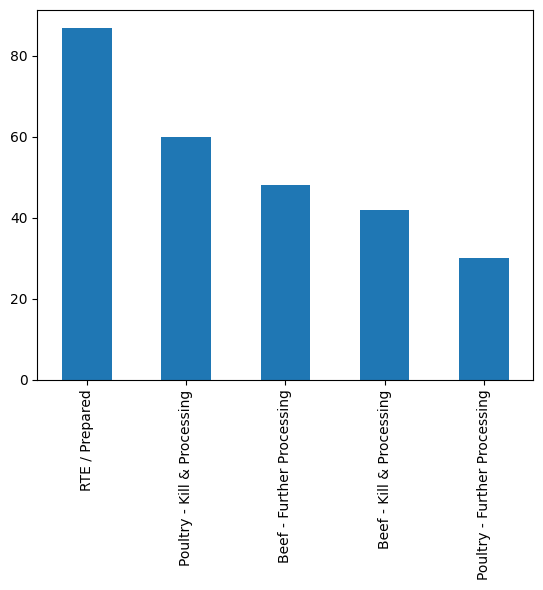

In [44]:
df['Market Segment'].value_counts().head().plot(kind='bar')

<Axes: ylabel='Market Segment'>

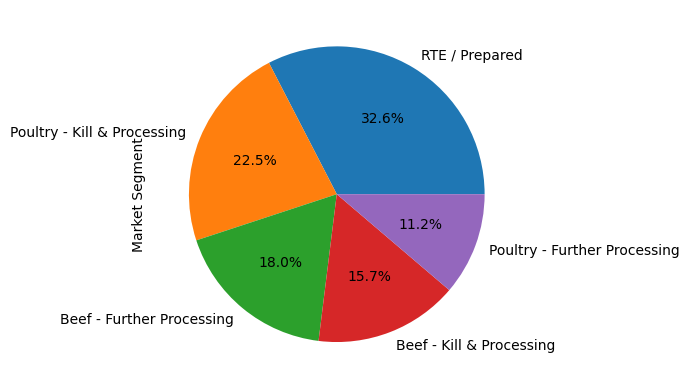

In [46]:
df['Market Segment'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

**Market Segment:**

- Opportunity Identification:<br><br> Higher occurrences in specific segments like 'RTE/Prepared' or 'Poultry - Kill & Processing' might indicate higher market demand or successful business areas. Focusing on these segments might yield higher profitability.<br><br>
- Diversification:<br><br> Segments with fewer occurrences like 'Dairy' or 'Beverage' might represent areas for potential growth or diversification if strategically viable.

#Top Five State or Province

In [59]:
df['Plant State/Province'].value_counts()

TX    39
IL    26
GA    26
MN    25
CA    22
IA    22
NE    22
NC    20
AR    17
WI    16
KS    15
AB    14
PA    13
IN    12
ON    11
WA    11
AL    10
MO    10
CO     9
LA     9
OK     7
KY     7
SC     7
MI     6
VA     6
OR     5
MA     4
OH     4
TN     4
BC     4
FL     4
UT     4
AZ     3
MS     3
ID     3
SD     3
DE     3
NJ     2
SK     1
MD     1
WV     1
VT     1
ME     1
RI     1
CT     1
NY     1
MB     1
NM     1
PE     1
Name: Plant State/Province, dtype: int64

<Axes: >

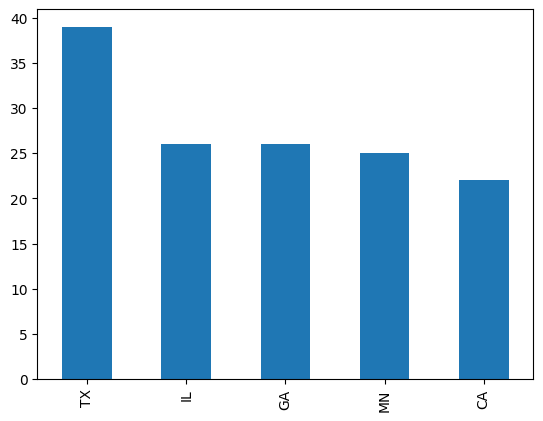

In [47]:
df['Plant State/Province'].value_counts().head().plot(kind='bar')

<Axes: ylabel='Plant State/Province'>

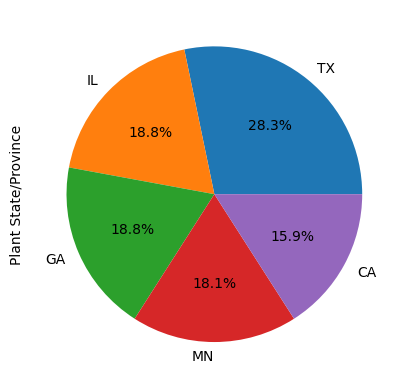

In [48]:
df['Plant State/Province'].value_counts().head().plot(kind='pie',autopct='%0.1f%%')

**Plant State/Province and Plant City:**

- Location Impact:<br><br> Identify states and cities with higher numbers of plants. It might reflect the availability of resources, market demand, or regional strategies for business expansion or cost optimization.<br><br>
- Logistical Considerations:<br><br> Locations with multiple plants might indicate favorable logistics or strategic placement for supply chain efficiency.

#Top 20 city

In [60]:
df['Plant City'].value_counts()

Portland          5
Fort Smith        5
Richmond          5
Gainesville       5
Chicago           5
                 ..
Hyrum             1
South St. Paul    1
Auburndale        1
Martinsville      1
Ottawa            1
Name: Plant City, Length: 339, dtype: int64

<Axes: >

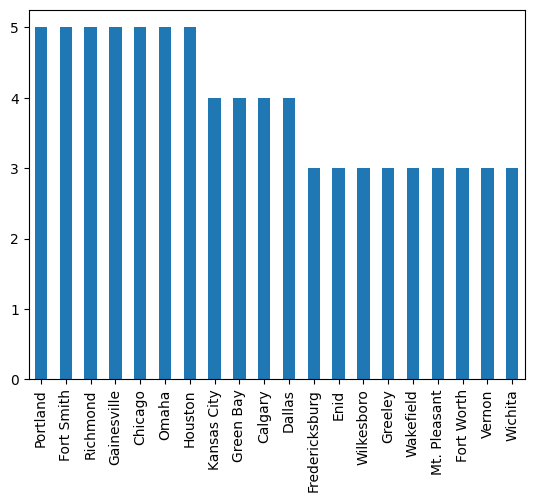

In [53]:
df['Plant City'].value_counts().head(20).plot(kind='bar')

<Axes: ylabel='Plant City'>

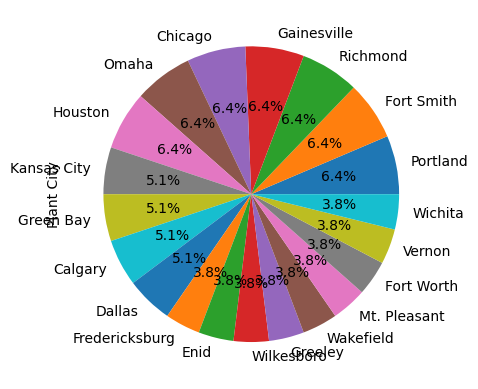

In [54]:
df['Plant City'].value_counts().head(20).plot(kind='pie',autopct='%0.1f%%')

#Top 10 Division

In [61]:
df['Division'].value_counts()

Northwest 18       55
Southeast 15       48
Central 16         41
Southwest 14       39
Southcentral 21    34
North 13           34
Midland 20         34
Midatlantic 23     31
Northeast 12       28
Midwest 11         26
Mideast 22         26
West 17            25
ICS 40             19
Name: Division, dtype: int64

<Axes: >

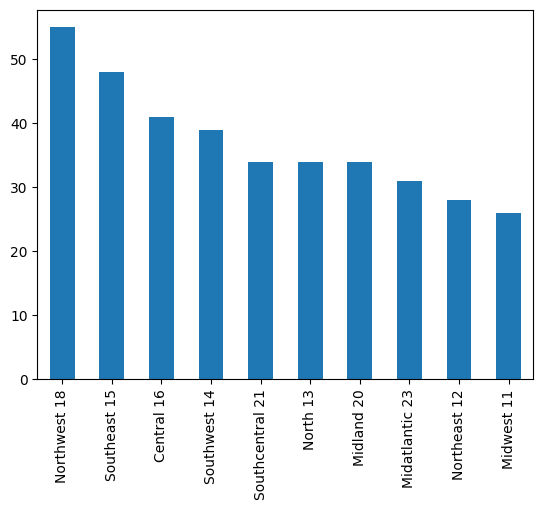

In [56]:
df['Division'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='Division'>

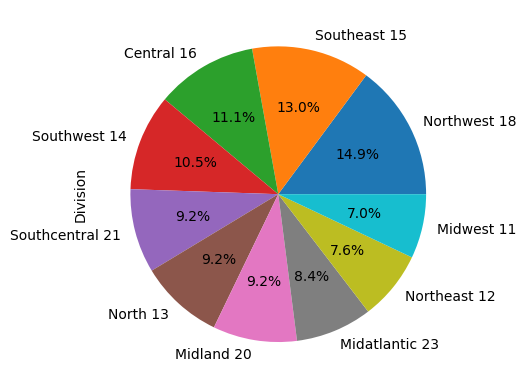

In [57]:
df['Division'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

**Division:**

- **Performance Analysis:** Higher occurrences in certain divisions might signify higher productivity or market dominance in those regions. Investigating successful practices from these divisions to implement elsewhere.<br><br>
- **Underperforming Divisions:** Divisions with fewer plants could be underperforming or might need more attention, resources, or strategic initiatives to increase their productivity and profitability.

#Actionable Insights:

**Increasing Productivity and Profit:**

- **Market Segments:** Focusing on segments with higher demand to increase output and profit margins.<br><br>
- **Location Analysis:** Investing in locations that show potential for growth and profitability based on plant count and strategic significance.<br><br>
- **Performance Review:**Understanding why certain divisions or segments are performing better and implementing successful strategies across other areas.

**Risk Mitigation:**

- **Underperforming Areas:** Addressing underperforming divisions or segments with strategies for improvement to reduce the risk of losses or decreased productivity.<br><br>
- **Market Diversification:** Considering diversifying into segments with low occurrences to reduce dependency on specific market segments.

**Efficiency and Cost Reduction:**

- **Logistics Optimization:** Optimizing logistics by strategically locating plants in regions that offer logistical advantages.<br><br>
- **Resource Allocation:** Considering reallocating resources from underperforming areas to improve overall efficiency.

#Bivariate Analysis



- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. We can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. We can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. We can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. We can plots like heatmap, stacked barplots, treemaps

In [62]:
df.columns

Index(['Division', 'Plnt #', 'Plant City', 'Plant State/Province',
       'Market Segment', 'Plant Age (Years)', 'Active Employees (no)',
       'Man Hours', 'Overtime', 'Retention Rate ', '% of English Speakers',
       '% Other/Not Specified', '% Spanish Speakers', 'Avg Tenure (Years)',
       'Turnover Rate', 'Severity Rate', 'Injury Recordable Rate',
       'Safety Assessment Score', 'Lost Days due to Injuries', 'Total Claims',
       '# of Recorable Events'],
      dtype='object')

#Division vs. Market Segment:<br>How is the distribution of market segments across different divisions?

In [63]:
pd.crosstab(df['Division'], df['Market Segment'])

Market Segment,Bakery,Beef - Further Processing,Beef - Kill & Processing,Beverage,Case Ready/ Deli,Confectionary (Candy / Chocolate),Dairy,Egg Processing,Grocery,Other - Non Protein,Other - Protein,Pet Food,Pizza,Pork - Further Processing,Pork - Kill & Processing,Poultry - Further Processing,Poultry - Kill & Processing,Produce / Fresh Cut,RTE / Prepared,Refrigerated Foods - Non Protein,Seafood,Snack Food,Warehouse
Division,,,,,,,,,,,,,,,,,,,,,,,
Central 16,2,10,4,0,1,1,0,0,0,2,1,0,1,0,2,1,0,3,12,0,0,1,0
ICS 40,0,3,1,0,0,0,0,0,0,0,0,0,0,1,0,4,7,0,3,0,0,0,0
Midatlantic 23,0,0,1,0,2,0,0,0,0,2,0,0,0,0,3,6,10,1,3,0,0,1,2
Mideast 22,1,1,1,0,2,0,0,2,0,0,2,0,0,1,1,2,2,1,6,0,0,4,0
Midland 20,0,4,5,0,0,0,0,2,0,2,0,1,0,4,7,0,1,0,8,0,0,0,0
Midwest 11,0,2,12,0,0,0,0,0,0,0,0,3,0,2,1,0,0,1,4,0,0,1,0
North 13,0,4,3,0,1,0,0,1,0,1,0,0,3,4,4,2,8,0,3,0,0,0,0
Northeast 12,1,4,0,0,3,1,0,0,0,1,0,0,0,2,1,1,3,2,8,0,0,0,0
Northwest 18,1,6,6,0,2,0,2,1,1,0,10,1,0,0,3,0,5,2,9,1,4,1,0


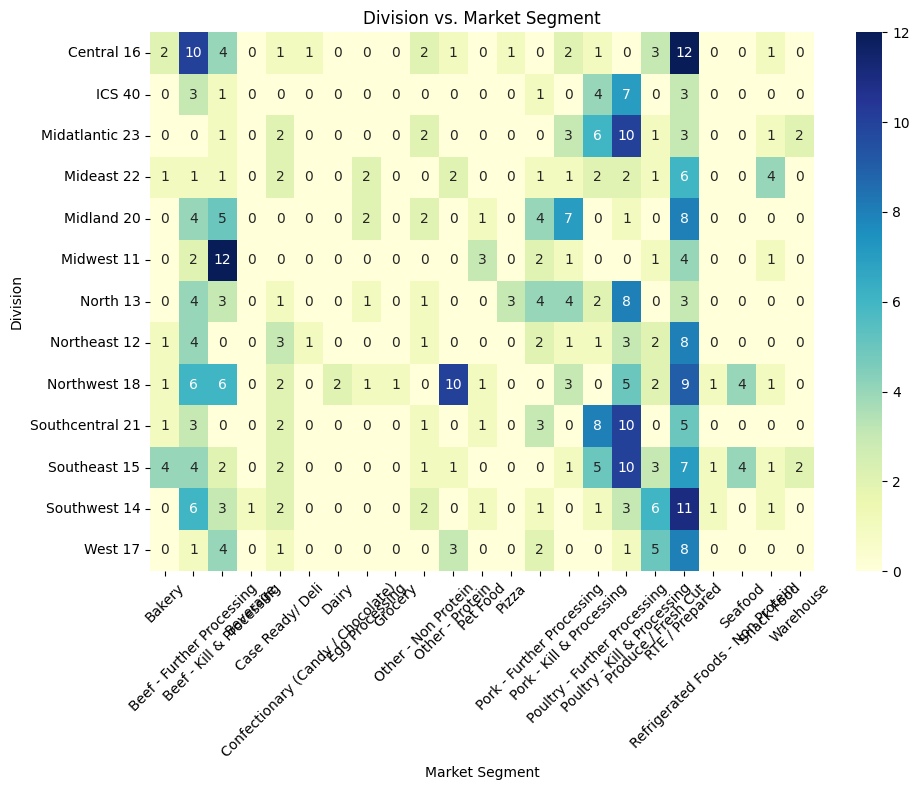

In [64]:
cross_tab = pd.crosstab(df['Division'], df['Market Segment'])

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d', cbar=True)
plt.title('Division vs. Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Division')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#How are the divisions distributed across different states or provinces?

In [65]:
pd.crosstab(df['Plant State/Province'], df['Division'])

Division,Central 16,ICS 40,Midatlantic 23,Mideast 22,Midland 20,Midwest 11,North 13,Northeast 12,Northwest 18,Southcentral 21,Southeast 15,Southwest 14,West 17
Plant State/Province,,,,,,,,,,,,,
AB,0,0,0,0,0,0,0,0,14,0,0,0,0
AL,0,1,0,0,0,0,0,0,0,0,9,0,0
AR,0,0,0,0,0,0,0,0,0,17,0,0,0
AZ,0,0,0,0,0,0,0,0,0,0,0,0,3
BC,0,0,0,0,0,0,0,0,4,0,0,0,0
CA,0,0,0,0,0,0,0,0,0,0,0,0,22
CO,0,0,0,0,0,9,0,0,0,0,0,0,0
CT,0,0,0,0,0,0,0,1,0,0,0,0,0
DE,0,2,0,0,0,0,0,1,0,0,0,0,0


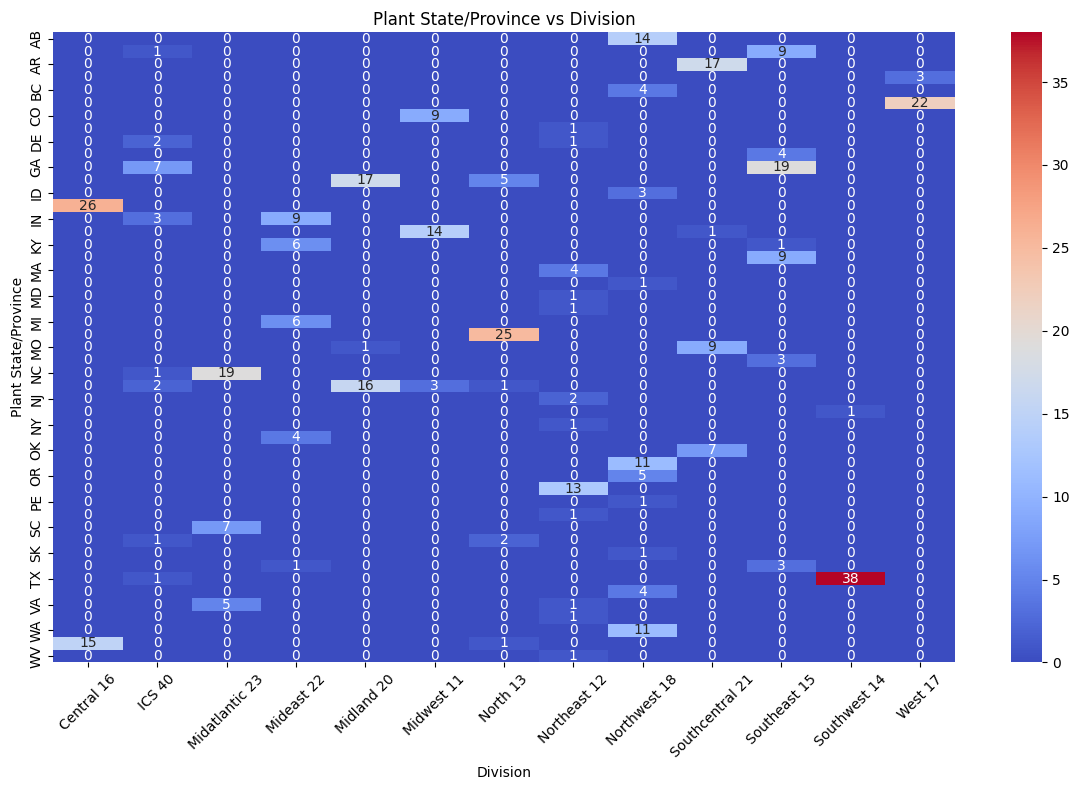

In [66]:
cross_tab = pd.crosstab(df['Plant State/Province'], df['Division'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='d')
plt.title('Plant State/Province vs Division')
plt.xlabel('Division')
plt.ylabel('Plant State/Province')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

#What are the popular market segments in different plant cities?

In [67]:
pd.crosstab(df['Plant City'], df['Market Segment'])

Market Segment,Bakery,Beef - Further Processing,Beef - Kill & Processing,Beverage,Case Ready/ Deli,Confectionary (Candy / Chocolate),Dairy,Egg Processing,Grocery,Other - Non Protein,Other - Protein,Pet Food,Pizza,Pork - Further Processing,Pork - Kill & Processing,Poultry - Further Processing,Poultry - Kill & Processing,Produce / Fresh Cut,RTE / Prepared,Refrigerated Foods - Non Protein,Seafood,Snack Food,Warehouse
Plant City,,,,,,,,,,,,,,,,,,,,,,,
Abbotsford,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Aberdeen,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albany,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albert Lea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
Albertville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisner,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Woburn,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Woodbridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


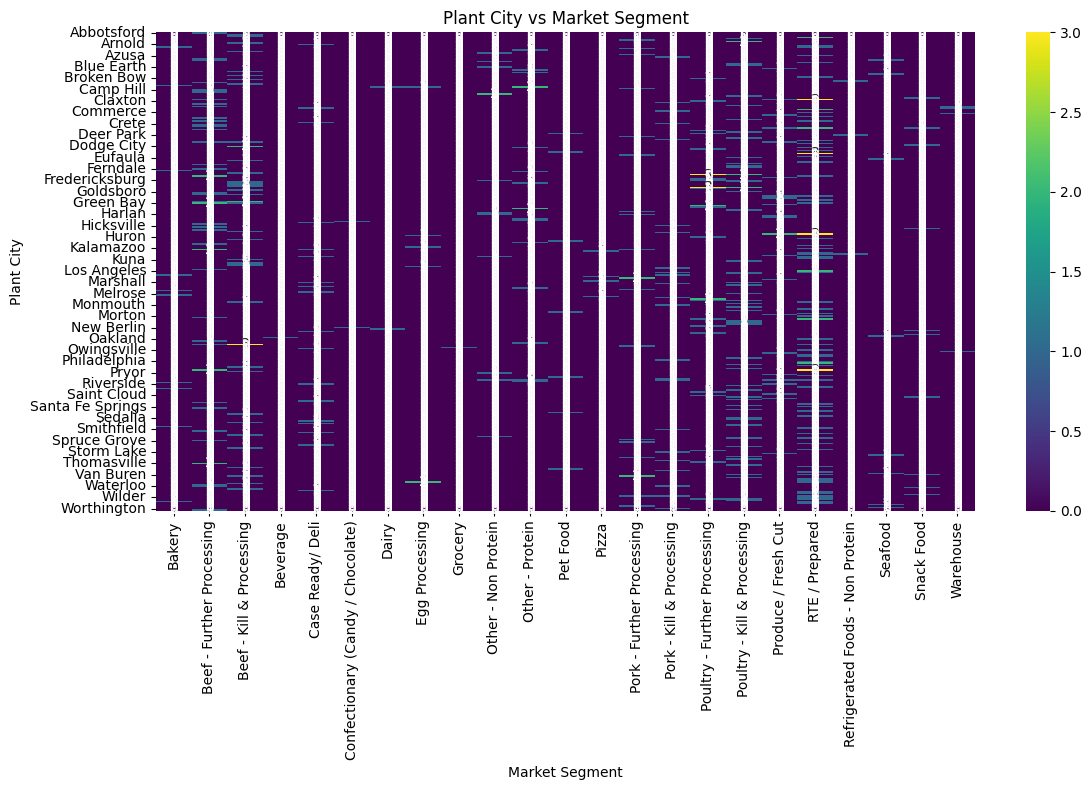

In [68]:
cross_tab = pd.crosstab(df['Plant City'], df['Market Segment'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='viridis', annot=True, fmt='d')
plt.title('Plant City vs Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Plant City')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()

#How does the age of the plant relate to the rate of recordable injuries?

In [69]:
pd.crosstab(df['Plant Age (Years)'], df['Injury Recordable Rate'])

Injury Recordable Rate,0.000000,0.576270,0.795172,0.800934,0.824441,0.992471,1.013039,1.083037,1.113807,1.116809,1.248076,1.267693,1.306934,1.307717,1.500399,1.539945,1.541212,1.659253,1.660821,1.792198,1.816058,1.888054,1.889488,1.901364,1.920478,2.137006,2.164834,2.260434,2.300415,2.337506,2.421950,2.450708,2.567671,2.636067,2.657755,2.726907,2.728279,2.737489,2.922383,2.968501,3.107507,3.237599,3.367841,3.486622,3.493973,3.590253,3.689324,3.700456,3.708124,3.723447,3.758632,3.792895,3.810756,4.094178,4.106411,4.176154,4.223870,4.239019,4.283670,4.537036,4.548777,4.556215,4.576551,4.786920,4.931973,4.938253,4.965699,5.049503,5.139122,5.229698,5.260229,5.294148,5.304158,5.413469,5.429891,5.455517,5.479521,5.531178,5.549654,5.637525,5.642136,5.671075,5.863885,5.946434,5.959778,6.189788,6.658307,6.708543,6.714081,7.076654,7.185444,7.271996,7.342298,7.366431,7.405259,7.572992,7.597606,7.693734,7.837967,7.899963,7.950838,8.149759,8.308280,8.324128,8.455322,8.818327,8.842949,8.917122,9.048922,9.492714,9.695268,9.858192,9.900951,10.081179,10.564082,10.749872,10.875128,11.668972,11.724006,11.960063,12.872436,13.372940,14.063699,14.283609,14.909382,14.919155,15.403087,16.540381,16.595968,16.785642,16.808314,16.819740,17.530458,18.658875,18.760177,19.824828,19.865215,20.224042,20.440033,20.498807,20.500328,20.682887,20.700044,20.841627,21.269717,23.156081,24.543702,24.917523,25.419227,26.092357,27.114796,27.727752,29.929031,32.725886,34.111822,42.836532,44.513638,57.297561
Plant Age (Years),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.060274,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.065753,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.082192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.109589,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.145205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25.632877,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#Which market segments have higher or lower active employee counts?

In [70]:
pd.crosstab(df['Market Segment'], df['Active Employees (no)'])

Active Employees (no),2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,53.0,54.0,55.0,56.0,57.0,58.0,62.0,63.0,64.0,66.0,67.0,68.0,69.0,70.0,72.0,73.0,75.0,76.0,77.0,80.0,81.0,82.0,83.0,86.0,87.0,88.0,92.0,93.0,94.0,97.0,98.0,99.0,101.0,102.0,103.0,104.0,107.0,108.0,109.0,114.0,115.0,120.0,122.0,123.0,127.0,128.0,132.0,133.0,134.0,140.0,144.0,151.0,152.0,153.0,155.0,157.0,160.0,161.0,162.0,166.0,167.0,169.0,170.0,174.0,179.0,186.0,210.0,216.0,240.0,245.0
Market Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bakery,0,0,0,0,0,1,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beef - Further Processing,2,1,2,1,5,1,2,1,1,2,2,3,0,0,0,0,2,2,1,1,0,0,1,1,2,1,0,0,0,0,0,1,0,1,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Beef - Kill & Processing,1,3,2,0,0,0,2,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,1,1,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1
Beverage,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Case Ready/ Deli,0,0,2,0,0,0,0,0,0,0,1,0,1,1,0,0,2,0,2,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Confectionary (Candy / Chocolate),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dairy,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Egg Processing,0,0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Grocery,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
df.head()

,Division,Plnt #,Plant City,Plant State/Province,Market Segment,Plant Age (Years),Active Employees (no),Man Hours,Overtime,Retention Rate,% of English Speakers,% Other/Not Specified,% Spanish Speakers,Avg Tenure (Years),Turnover Rate,Severity Rate,Injury Recordable Rate,Safety Assessment Score,Lost Days due to Injuries,Total Claims,# of Recorable Events
0,Midwest 11,409,Wichita,KS,Pork - Kill & Processing,9.276712,3.0,4148.07,2.506415,1.0,0.333333,0.333333,0.333333,8.108676,0.333333,0.0,0.0,98.676667,0.0,0.0,0
1,Southcentral 21,553,Fort Smith,AR,Poultry - Kill & Processing,9.832877,11.0,14189.20,27.565472,0.7,0.666667,0.000000,0.333333,3.821613,0.800000,0.0,0.0,98.575000,0.0,0.0,0
2,Southwest 14,455,Northlake,TX,Beverage,2.690411,3.0,4109.26,3.286604,0.5,0.666667,0.000000,0.333333,2.324201,0.857143,0.0,0.0,98.057500,0.0,0.0,0
3,Southeast 15,834,St. Martinville,LA,RTE / Prepared,3.715068,5.0,6005.52,1.205094,0.6,0.800000,0.200000,0.000000,3.549589,1.636364,0.0,0.0,97.966667,0.0,0.0,0
4,Northeast 12,284,Woburn,MA,Pork - Further Processing,13.430137,10.0,10864.01,1.820566,0.6,0.100000,0.200000,0.700000,4.642192,0.571429,0.0,0.0,97.910000,0.0,0.0,0


#How does the 'Injury Recordable Rate' vary across different 'Market Segments' or 'Plant States'? Which segment or state has the highest injury rate?

In [73]:
injury_by_segment = df.groupby('Market Segment')['Injury Recordable Rate'].mean().sort_values(ascending=False)
injury_by_state = df.groupby('Plant State/Province')['Injury Recordable Rate'].mean().sort_values(ascending=False)

print("Average Injury Recordable Rate by Market Segment:")
print()
print(injury_by_segment)

print("\nAverage Injury Recordable Rate by Plant State/Province:")
print()
print(injury_by_state)

Average Injury Recordable Rate by Market Segment:

Market Segment
Bakery                               6.105498
Other - Non Protein                  4.667847
Pork - Further Processing            4.604052
Pet Food                             4.228573
Poultry - Further Processing         3.696221
Other - Protein                      3.644556
Pork - Kill & Processing             3.635744
RTE / Prepared                       3.581262
Produce / Fresh Cut                  3.541497
Egg Processing                       3.473604
Poultry - Kill & Processing          3.413145
Snack Food                           3.170480
Seafood                              3.020255
Case Ready/ Deli                     2.622925
Beef - Kill & Processing             2.510170
Beef - Further Processing            2.344669
Warehouse                            1.465971
Confectionary (Candy / Chocolate)    0.000000
Pizza                                0.000000
Beverage                             0.000000
Refrigerated F

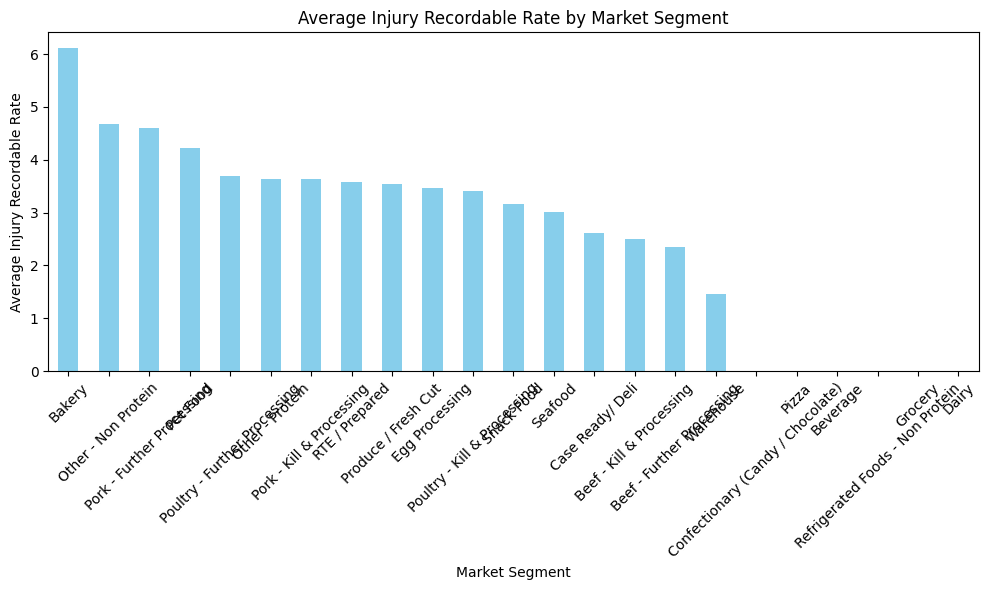

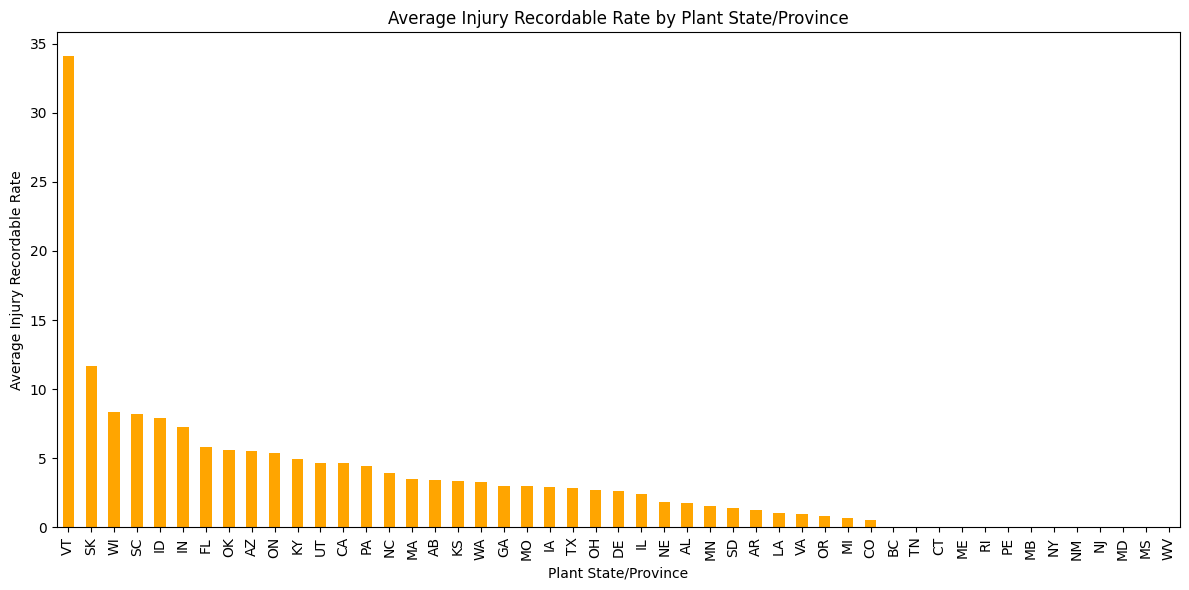

In [74]:
plt.figure(figsize=(10, 6))
injury_by_segment.plot(kind='bar', color='skyblue')
plt.title('Average Injury Recordable Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Injury Recordable Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting 'Injury Recordable Rate' by Plant State/Province
plt.figure(figsize=(12, 6))
injury_by_state.plot(kind='bar', color='orange')
plt.title('Average Injury Recordable Rate by Plant State/Province')
plt.xlabel('Plant State/Province')
plt.ylabel('Average Injury Recordable Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Is there any correlation between 'Man Hours' and 'Lost Days due to Injuries'? How does this differ among different divisions or cities?

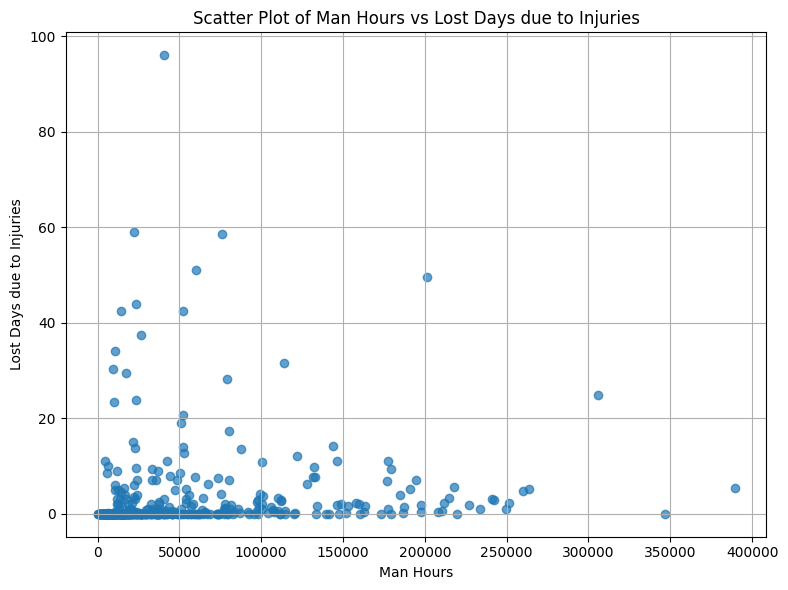

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Man Hours'], df['Lost Days due to Injuries'], alpha=0.7)
plt.title('Scatter Plot of Man Hours vs Lost Days due to Injuries')
plt.xlabel('Man Hours')
plt.ylabel('Lost Days due to Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
# Correlation between 'Man Hours' and 'Lost Days due to Injuries'
correlation = df['Man Hours'].corr(df['Lost Days due to Injuries'])
print(f"Correlation between Man Hours and Lost Days due to Injuries: {correlation}")

Correlation between Man Hours and Lost Days due to Injuries: 0.11023664502329655


In [77]:
# Analyzing correlation by Division
division_correlation = df.groupby('Division')[['Man Hours', 'Lost Days due to Injuries']].corr().iloc[0::2, -1]
print("\nCorrelation between Man Hours and Lost Days due to Injuries by Division:")
print(division_correlation)


Correlation between Man Hours and Lost Days due to Injuries by Division:
Division                  
Central 16       Man Hours    0.101421
ICS 40           Man Hours   -0.172412
Midatlantic 23   Man Hours    0.061750
Mideast 22       Man Hours    0.707029
Midland 20       Man Hours    0.108715
Midwest 11       Man Hours    0.451480
North 13         Man Hours    0.078675
Northeast 12     Man Hours    0.120073
Northwest 18     Man Hours    0.015935
Southcentral 21  Man Hours    0.183116
Southeast 15     Man Hours    0.283615
Southwest 14     Man Hours    0.408786
West 17          Man Hours    0.022775
Name: Lost Days due to Injuries, dtype: float64


In [78]:
# Analyzing correlation by Plant City
city_correlation = df.groupby('Plant City')[['Man Hours', 'Lost Days due to Injuries']].corr().iloc[0::2, -1]
print("\nCorrelation between Man Hours and Lost Days due to Injuries by Plant City:")
print(city_correlation)


Correlation between Man Hours and Lost Days due to Injuries by Plant City:
Plant City            
Abbotsford   Man Hours    NaN
Aberdeen     Man Hours    NaN
Albany       Man Hours    NaN
Albert Lea   Man Hours    1.0
Albertville  Man Hours    NaN
                         ... 
Wisner       Man Hours    NaN
Woburn       Man Hours    NaN
Woodbridge   Man Hours    NaN
Worthington  Man Hours    NaN
Yankton      Man Hours    NaN
Name: Lost Days due to Injuries, Length: 339, dtype: float64
